In [1]:

fromDate = '2010-01-01'
# metrics = ['AdrBal1in10BCnt','AdrBal1in1BCnt', 'AdrBal1in100MCnt', 'AdrBal1in10MCnt']
metrics = ['AdrBal1in10BCnt','AdrBal1in10BCnt_func_limited','AdrBal1in10BCnt_func_logistic'] 
#metrics = ['AdrBal1in100MCnt', 'AdrBal1in10MCnt'] 
#metrics = ['AdrBalUSD100Cnt', 'AdrBalUSD1KCnt','AdrBalUSD10KCnt'] 
#metrics = ['AdrBalUSD10KCnt'] 

#metrics = ['AdrBalUSD1MCnt','AdrBalUSD10KCnt', 'AdrBalUSD1KCnt', 'AdrBalUSD100Cnt'] 

# all
#coins = ['YFI','ZEC','ETH','ADA','ETC','LTC', 'BTC','MKR', 'BTG',"AAVE","MATIC_ETH", "MANA", "UNI", "COMP","BAL","BAT", "SUSHI", "DOGE","1INCH", 'LINK']

# watchlist
#coins = ['ETH','BTC','MKR',"AAVE","MATIC_ETH", "MANA", "UNI","BAL", 'LINK', 'CRV' ]

# Non-fi
#coins = ['ETH',"MANA", "BAT"]

# oldies
# coins = ['ETH','ETC','LTC', 'BTC', "DOGE", 'ADA', 'LINK','ZEC']

# BTC
coins = [ 'BTC']

# Payment
# coins = ['XRP','XLM','ALGO']

#coins = ['ETH', 'BTC', "MATIC_ETH", "MANA", "UNI", "COMP","BAL","BAT", "SUSHI","1INCH",'MKR']

# DEX
# coins = ['BAL', "UNI", "SUSHI","1INCH", "CRV", 'LINK', 'YFI']

# Lending
#coins = ['COMP', 'AAVE', "MKR"]

#coins = ['ETH', 'BTC', "MATIC_ETH", "MANA", "SUSHI","1INCH", 'CRV']

In [2]:
import pandas as pd
df = pd.read_csv('data/wallets.csv', encoding = "utf-16", sep='\t')
df['Time']= pd.to_datetime(df['Time'])
df.set_index(['Time'],inplace=True, verify_integrity = True, drop = True)
df = df[fromDate:]
# dfy = pd.DataFrame()
# for col in df.columns:
#    [coin, metric] = col.split("_", 1)
#    print("Coin : {}, Metric : {}".format(coin,metric))
#    if  not metric: 
#        raise Exception("Column {} doesn't adhere to coin_metrics naming convenrtion".format(coin))
#    dfy.loc(axis=1)[(coin, metric)] = df.loc(axis=1)[col]
#    dfy = pd.concat([dfx,dfy], axis=1)

df.head(2)

,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,SUSHI_AdrBal1in100MCnt,SUSHI_AdrBal1in10MCnt,SUSHI_AdrBal1in1MCnt,SUSHI_AdrBalUSD10MCnt,SUSHI_AdrBalUSD1MCnt,SUSHI_AdrBalUSD100KCnt,SUSHI_AdrBalUSD10KCnt,SUSHI_AdrBalUSD1KCnt,SUSHI_AdrBalUSD100Cnt,SUSHI_AdrBalUSD10Cnt
Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,NaN,0.0,27949.833333,27949.833333,27946.933333,27942.900000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,0.0,28069.200000,28069.200000,28066.133333,28062.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:

df.loc(axis=1)[('BTC_AdrBal1in10BCnt_func_unlimited')]=1000000
min_date = df.index.min()
initial_BTC_AdrBal1in10BCnt = df['BTC_AdrBal1in10BCnt'][min_date]
def linear_growth_func(y_previous,a):
    return y_previous+a
def unlimited_growth_func(y_previous,r):
    return y_previous+r*y_previous
def logistic_growth_func(y_previous,r,M,m=1):
    return y_previous+y_previous*r*(1-(y_previous/M))**(1/m)
i = 0
y_prev=initial_BTC_AdrBal1in10BCnt
for index, row in df.iterrows():
    y=unlimited_growth_func(y_prev,1/450)
    df.loc[index,('BTC_AdrBal1in10BCnt_func_limited')]= y
    
    y_prev=y
    i=i+1
i=0
y_prev=initial_BTC_AdrBal1in10BCnt
for index, row in df.iterrows():
    y=logistic_growth_func(y_prev,1/450,40*1000*1000,1/4)
    df.loc[index,('BTC_AdrBal1in10BCnt_func_logistic')]= y
    
    y_prev=y
    i=i+1
    
df

,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,BTC_AdrBal1in10BCnt_func_logistic_annual_change,BTC_kAdrBal1in10BCnt,BTC_kAdrBal1in10BCnt_func_limited,BTC_kAdrBal1in10BCnt_func_logistic,USD_m2_supply,USD_m2_supply_index,BTC_Price_m2,BTC_k_m2AdrBal1in10BCnt,BTC_k_m2AdrBal1in10BCnt_func_limited,BTC_k_m2AdrBal1in10BCnt_func_logistic
Time,,,,,,,,,,,,,,,,,,,,,
2010-01-01,NaN,NaN,0.000000e+00,2.794983e+04,2.794983e+04,2.794693e+04,27942.900000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8534.2,1.024268,NaN,NaN,NaN,NaN
2010-01-02,NaN,NaN,0.000000e+00,2.806920e+04,2.806920e+04,2.806613e+04,28062.333333,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8534.2,1.024268,NaN,NaN,NaN,NaN
2010-01-03,NaN,NaN,0.000000e+00,2.819357e+04,2.819357e+04,2.819033e+04,28186.766667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8534.2,1.024268,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,0.000000e+00,2.831970e+04,2.831970e+04,2.831630e+04,28312.966667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8534.2,1.024268,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,0.000000e+00,2.844903e+04,2.844903e+04,2.844547e+04,28442.366667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8534.2,1.024268,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-23,23262.291891,4.486382e+11,3.827822e+11,1.867566e+07,8.772660e+06,2.880620e+06,542216.666667,4937.833333,67705.833333,283592.900000,...,0.021492,0.001401,3.448160e-07,0.001147,21149.1,2.538298,9164.523126,551.794306,0.135845,451.779551
2023-02-24,23264.516547,4.487030e+11,3.828465e+11,1.867911e+07,8.773541e+06,2.881066e+06,542248.200000,4937.133333,67701.366667,283630.266667,...,0.021445,0.001400,3.433214e-07,0.001147,21149.1,2.538298,9165.399562,551.643502,0.135257,451.788295
2023-02-25,23269.554079,4.488218e+11,3.829162e+11,1.868346e+07,8.774550e+06,2.881490e+06,542274.033333,4936.366667,67698.200000,283678.766667,...,0.021399,0.001400,3.418747e-07,0.001147,21149.1,2.538298,9167.384172,551.506089,0.134687,451.851732


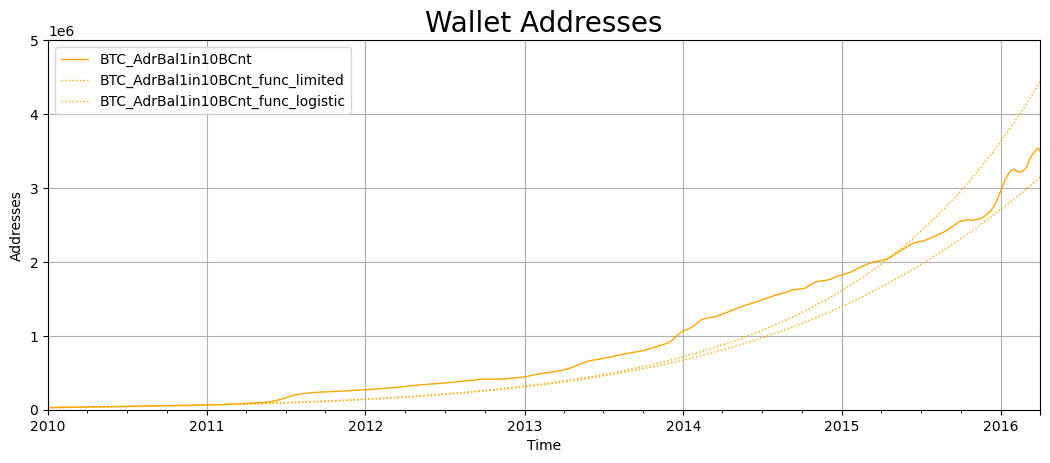

In [22]:
import matplotlib.pyplot as plt

F = plt.gcf()
DefaultSize = F.get_size_inches()

plt.title("Wallet Addresses", fontsize=20)
plt.ylabel("Addresses")
plt.xlabel('Date')


metric_linestyles = {
    'AdrBal1in10BCnt':'-',
    'AdrBal1in1BCnt':'--',
    'AdrBal1in100MCnt':'-.',    
    'AdrBal1in10MCnt':':',    
    'AdrBalUSD1MCnt':':',
    'AdrBalUSD10KCnt':'-.',
    'AdrBalUSD1KCnt':'--',    
    'AdrBalUSD100Cnt':'-', 
    'AdrBal1in10BCnt_func_unlimited':'--',
    'AdrBal1in10BCnt_func_limited':':', 
    'AdrBal1in10BCnt_func_logistic':':'     
}
coin_colors = {
    'BTC':'orange',
    'ETH':'grey',
    'AAVE':'purple',
    'LTC':'lightblue',
    'MKR':'lightgreen',
    'MATIC_ETH':'blue',
    'UNI':'pink',
    'LDO':'darkred',
    'BAL':'brown',
    'CRV': 'red',
    'ETC' : 'lightgreen',
    'ADA':'teal',
    'BIFI' :'lightgrey',
    'LINK' : 'darkblue',
    'XRP' : 'black',
    'XLM' : 'grey',
    'ALGO' : 'green',
    'BTG' : 'yellow',
    'BAL' : 'brown',
    'SUSHI': 'magenta',
    'COMP' : 'green',
    'DOGE': 'brown',
    'BAT': 'crimson',
    'MANA': 'deeppink',
    '1INCH': 'hotpink',
    'ZEC': 'darkgrey',
    'YFI' : 'darkorange'
    
}
coin_max_supply = {
    'BTC': 21000000,
    'ETH': 122373866, # total supply as of 2023.01.01
    'AAVE':16000000,
    'LTC': 84000000,
    'MKR': 1005577,
    'MATIC_ETH': 10000000000,
    'UNI':1000000000,
    'LDO':1000000000,
    'BAL': 96150704,
    'CRV': 3303030299,
    'ETC' : 210000000,
    'ADA': 45000000000,
    'BIFI' :80000,
    'LINK' : 1000000000,
    'XRP' : 100* 1000000000,
    'XLM' : 50001806812,
    'ALGO' : 10*1000000000,
    'BTG' : 21000000,
    'SUSHI': 250000000,
    'COMP' : 10000000,
    'DOGE': 132670764300, # total supply as of 2023.01.01
    'BAT': 1500000000,
    'MANA': 2193539027, # total supply as of 2023.01.01
    '1INCH': 1500000000,
    'ZEC': 21000000,
    'YFI' : 36666
    
}
for metric in metrics:
    for coin in coins: 
        df[coin + '_' + metric][:'2016-04-01'].plot(c=coin_colors[coin],label=coin + '_' + metric,linewidth=1, ls = metric_linestyles[metric])

plt.grid()
plt.legend(loc='upper left')
plt.ylim((0,5000000))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )


In [5]:

#df.loc(axis=1)[coin + '_'+ metric + '_annual_change']


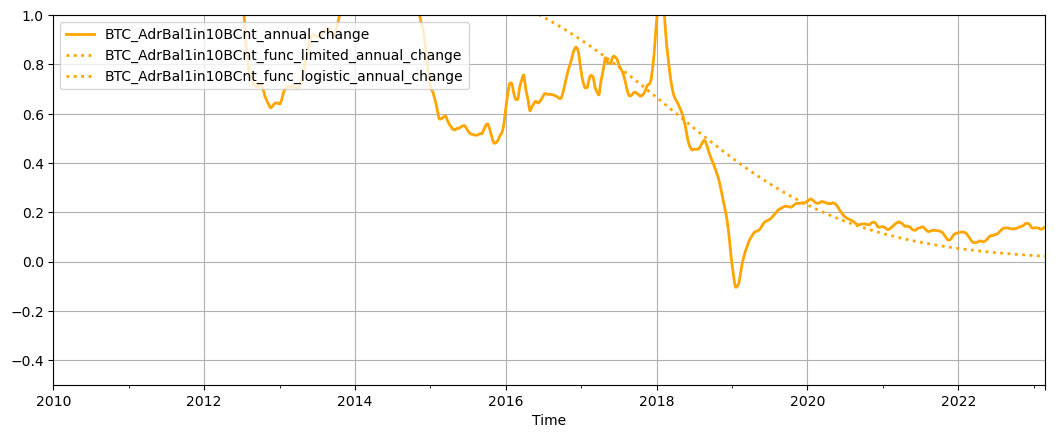

In [6]:
pd.options.mode.chained_assignment = None  # default='warn'
# metric = 'AdrBal1in1BCnt'
for metric in metrics:
    for coin in coins: 
        df.loc(axis=1)[coin + '_'+ metric + '_annual_change'] = df.loc(axis=1)[coin + '_'+ metric].pct_change(axis=0, freq= pd.Timedelta(365, "d")) *1
for metric in metrics:
    for coin in coins: 
        df[coin + '_' + metric + '_annual_change'].plot(c=coin_colors[coin],label=coin + '_' + metric + '_annual_change',linewidth=2, ls = metric_linestyles[metric])
F = plt.gcf()
plt.grid()

plt.gca().set_ylim([-0.5,1])
plt.legend(loc='upper left')
#plt.ylim((0,1))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )



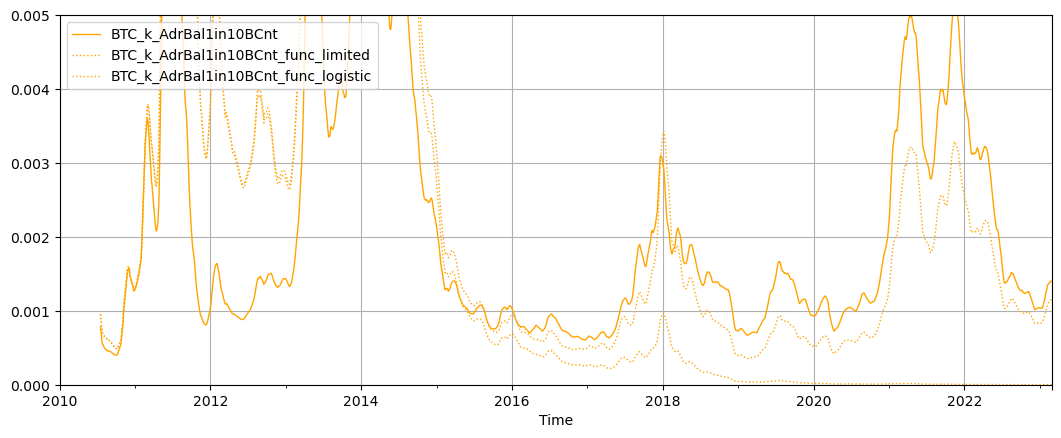

In [7]:
# metric = 'AdrBal1in1BCnt'
for metric in metrics:
    for coin in coins: 
#    df.loc(axis=1)[coin + '_k'] = df.loc(axis=1)[coin + '_CapMrktCurUSD']/(df.loc(axis=1)[coin + '_'+metric]*df.loc(axis=1)[coin + '_'+metric])
        df.loc(axis=1)[coin + '_k'+ metric] = coin_max_supply[coin]* df.loc(axis=1)[coin + '_Price']/(df.loc(axis=1)[coin + '_'+metric]*df.loc(axis=1)[coin + '_'+metric])

for metric in metrics:
    for coin in coins: 
        df[coin + '_k'+ metric].plot(c=coin_colors[coin],label=coin + '_k_'+metric,linewidth=1, ls = metric_linestyles[metric])
F = plt.gcf()
plt.grid()
plt.legend(loc='upper left')
plt.ylim((0,0.005))
F.set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*1) )

In [8]:
def convert_to_m2(df,dt):
    iloc_idx = df.index.get_indexer([dt], method='nearest')  # returns absolute index into df e.g. array([5])
    loc_idx = df.index[iloc_idx]                             # if you want named index
    # my_val = df.iloc[iloc_idx]
    return df.loc[loc_idx,'WM2NS'].values[0] 
df_m2 = pd.read_csv('data/WM2NS.csv')
df_m2['DATE']= pd.to_datetime(df_m2['DATE'])
df_m2.set_index(['DATE'],inplace=True, verify_integrity = True, drop = True)
df.loc(axis=1)[('USD_m2_supply')] = df.index.map(lambda dt: convert_to_m2(df_m2,dt))

btc_birthday = pd.to_datetime('2009-01-03')
m2_supply_at_genesis = convert_to_m2(df_m2,btc_birthday)
df.loc(axis=1)[('USD_m2_supply_index')] = df.loc(axis=1)[('USD_m2_supply')]/m2_supply_at_genesis

for coin in coins: 
    df.loc(axis=1)[(coin+'_Price_m2')] = df.loc(axis=1)[(coin+'_Price')] /df.loc(axis=1)[('USD_m2_supply_index')]
    
    #df.loc(axis=1)[(coin+'_CapMrktCurUSD_m2')] = df.loc(axis=1)[(coin+'_CapMrktCurUSD')] /df.loc(axis=1)[('USD_m2_supply_index')]

df.tail(2)


,BTC_Price,BTC_CapMrktCurUSD,BTC_CapRealUSD,BTC_AdrBal1in10BCnt,BTC_AdrBal1in1BCnt,BTC_AdrBal1in100MCnt,BTC_AdrBal1in10MCnt,BTC_AdrBalUSD10MCnt,BTC_AdrBalUSD1MCnt,BTC_AdrBalUSD100KCnt,...,BTC_AdrBal1in10BCnt_func_logistic,BTC_AdrBal1in10BCnt_annual_change,BTC_AdrBal1in10BCnt_func_limited_annual_change,BTC_AdrBal1in10BCnt_func_logistic_annual_change,BTC_kAdrBal1in10BCnt,BTC_kAdrBal1in10BCnt_func_limited,BTC_kAdrBal1in10BCnt_func_logistic,USD_m2_supply,USD_m2_supply_index,BTC_Price_m2
Time,,,,,,,,,,,,,,,,,,,,,
2023-02-26,23285.274078,4.491469e+11,3.829950e+11,1.868657e+07,8.775214e+06,2881896.4,542301.966667,4937.266667,67705.400000,283807.5,...,2.064196e+07,0.138584,1.248383,0.021352,0.001400,3.405902e-07,0.001148,21149.1,2.538298,9173.577297
2023-02-27,23301.786743,4.494872e+11,3.830744e+11,1.868818e+07,8.776068e+06,2882346.1,542334.833333,4938.266667,67713.866667,283941.0,...,2.064274e+07,0.138508,1.248383,0.021305,0.001401,3.393219e-07,0.001148,21149.1,2.538298,9180.082705


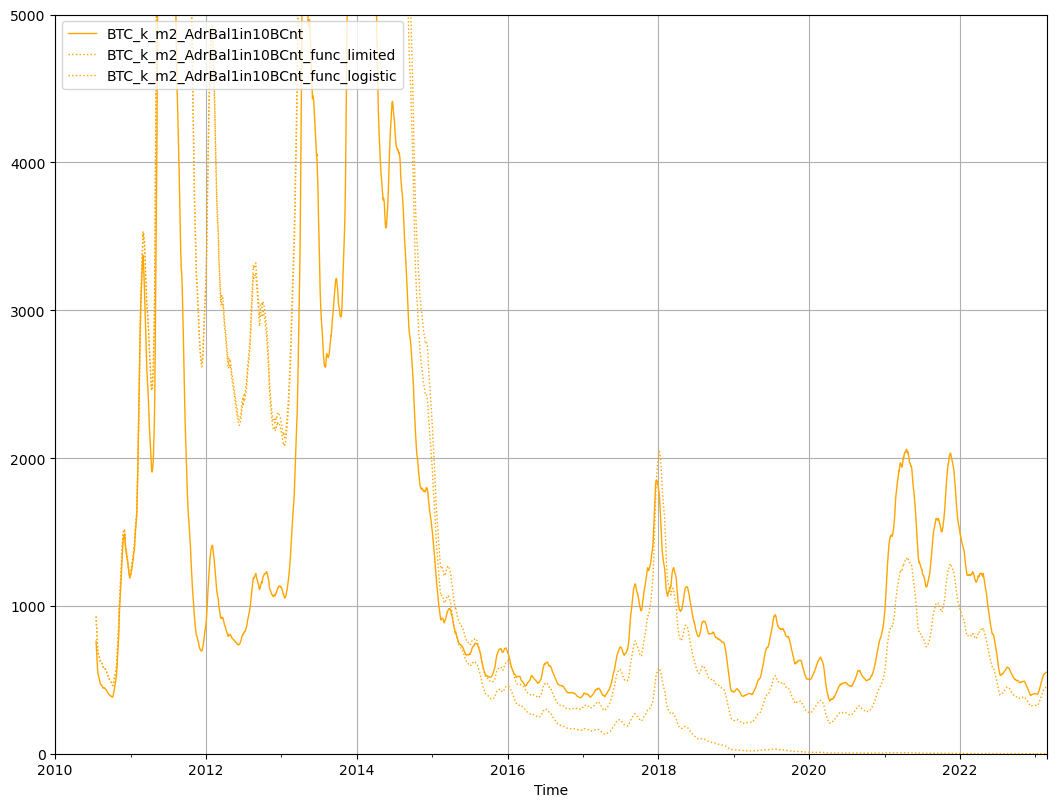

In [9]:
# metric = 'AdrBal1in1BCnt'
#coins = ['BTC','LTC']
import numpy as np
for metric in metrics:
    for coin in coins: 
        df.loc(axis=1)[coin + '_k_m2'+ metric] = 1000*1000*coin_max_supply[coin]* df.loc(axis=1)[coin + '_Price_m2']/(df.loc(axis=1)[coin + '_'+metric]*df.loc(axis=1)[coin + '_'+metric])
#        df.loc(axis=1)[coin + '_l2_m2'+ metric] = coin_max_supply[coin]* df.loc(axis=1)[coin + '_Price_m2']/(df.loc(axis=1)[coin + '_'+metric]*np.log2(df.loc(axis=1)[coin + '_'+metric]))
#        df.loc(axis=1)[coin + '_l10_m2'+ metric] = coin_max_supply[coin]* df.loc(axis=1)[coin + '_Price_m2']/(df.loc(axis=1)[coin + '_'+metric]*np.log10(df.loc(axis=1)[coin + '_'+metric]))

        #    df.loc(axis=1)[coin + '_k_m2'] = df.loc(axis=1)[coin + '_CapMrktCurUSD_m2']/(df.loc(axis=1)[coin + '_'+metric]*df.loc(axis=1)[coin + '_'+metric])
#    df.loc(axis=1)[coin + '_k_m2_mc'] = 21000000*df.loc(axis=1)[coin + '_Price_m2']/(df.loc(axis=1)[coin + '_'+metric]*df.loc(axis=1)[coin + '_'+metric])
for metric in metrics:
    for coin in coins: 
        df[coin + '_k_m2'+ metric].plot(c=coin_colors[coin],label=coin + '_k_m2_'+ metric,linewidth=1, ls = metric_linestyles[metric])
   
#        df[coin + '_l2_m2'+ metric].plot(c='b',label=coin + '_l2_m2_'+ metric,linewidth=1, ls = metric_linestyles[metric])
#        df[coin + '_l10_m2'+ metric].plot(c='g',label=coin + '_l10_m2_'+ metric,linewidth=1, ls = metric_linestyles[metric])

        #    df[coin + '_k_m2_mc'].plot(c=coin_colors[coin],label=coin + '_k_m2_mc',linewidth=2)

    plt.gca().set_ylim([0,5000])
#    plt.gca().grid(which='major', alpha=0.8)
#    plt.gca().grid(which='minor', alpha=0.65) 
plt.grid()
plt.legend(loc='upper left')
#plt.ylim((0,20000))
plt.gcf().set_size_inches( (DefaultSize[0]*2, DefaultSize[1]*2) )
